In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
monitored_runs = ["../results/LSTMConfig/20180228_103702/", ## full-size LSTM run without extra layer, hidden_size = 17
                  "../results/LSTMConfig/20180228_104901/", ## full-size LSTM run with extra layer, hidden_size = 17
                  "../results/NaiveConfig/20180228_104525/", ## full-size Naive run, hidden_size = 10
                  "../results/NaiveConfig/20180228_105944/", ## full-size Naive run, hidden_size = 50
                  "../results/LSTMConfig/20180228_110252/", ## full-size LSTM run with extra layer, hidden_size = 17, 30 epoch
                 ]


In [3]:
all_losses = []
for monitored_run in monitored_runs:
    losses = []
    with open(monitored_run + "losses.los", 'r') as f:
        for l in f:
            losses.append(float(l.strip()))
    all_losses.append(losses)

In [32]:
all_losses[0][-5]

2.445862

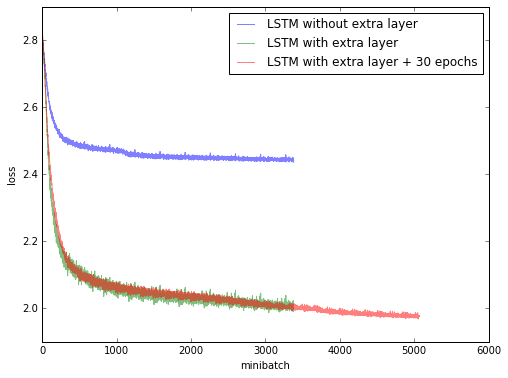

In [15]:
plt.figure(figsize = (8, 6))
plt.plot(all_losses[0], label = "LSTM without extra layer", alpha = .5)
plt.plot(all_losses[1], label = "LSTM with extra layer", alpha = .5)
plt.plot(all_losses[4][::1], label = "LSTM with extra layer + 30 epochs", alpha = .5)

plt.xlabel("minibatch")
plt.ylabel("loss")
plt.legend()
plt.show()

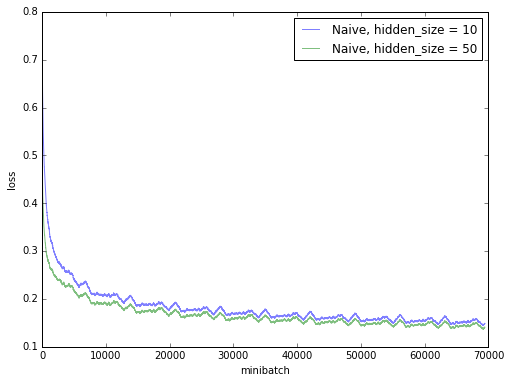

In [16]:
plt.figure(figsize = (8, 6))
N = 1000
l1 = np.convolve(all_losses[2], np.ones((N,))/N, mode='valid')
l2 = np.convolve(all_losses[3], np.ones((N,))/N, mode='valid')
plt.plot(l1, label = "Naive, hidden_size = 10", alpha = .5)
plt.plot(l2, label = "Naive, hidden_size = 50", alpha = .5)

plt.xlabel("minibatch")
plt.ylabel("loss")
plt.legend()
plt.show()

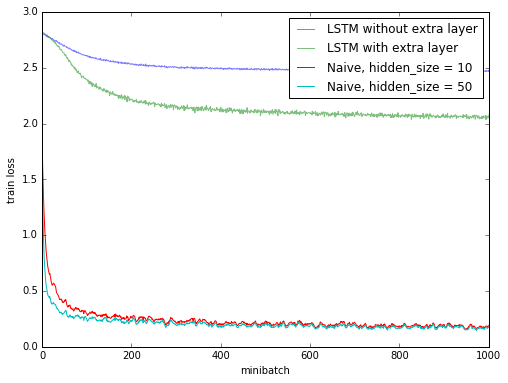

In [33]:
plt.figure(figsize = (8, 6))

plt.plot(all_losses[0], label = "LSTM without extra layer", alpha = .5)
plt.plot(all_losses[1], label = "LSTM with extra layer", alpha = .5)

N = 100
l1 = np.convolve(all_losses[2], np.ones((N,))/N, mode='valid')
l2 = np.convolve(all_losses[3], np.ones((N,))/N, mode='valid')
plt.plot(l1[::21], label = "Naive, hidden_size = 10")
plt.plot(l2[::21], label = "Naive, hidden_size = 50")

plt.xlabel("minibatch")
plt.ylabel("train loss")

plt.xlim((0, 1000))

plt.legend()
plt.show()

In [19]:
len(all_losses[0])

3380

In [20]:
len(all_losses[2])

70430

In [21]:
70430 / 3380

20.837278106508876